<a href="https://colab.research.google.com/github/muratcankoylan/Cohere_code_interpreter/blob/main/Cohere_code_interpreter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --quiet langchain langchain_cohere langchain_experimental

In [ ]:
import os
os.environ['COHERE_API_KEY'] = ""

In [ ]:
from langchain_cohere.chat_models import ChatCohere
chat = ChatCohere(model="command-r-plus", temperature=0.3)

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

os.environ['TAVILY_API_KEY'] = "tvly-"

internet_search = TavilySearchResults()
internet_search.name = "internet_search"
internet_search.description = "Returns a list of relevant document snippets for a textual query retrieved from the internet."

from langchain_core.pydantic_v1 import BaseModel, Field
class TavilySearchInput(BaseModel):
    query: str = Field(description="Query to search the internet with")
internet_search.args_schema = TavilySearchInput

In [ ]:
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="Executes python code and returns the result. The code runs in a static sandbox without interactive mode, so print output or save output to a file.",
    func=python_repl.run,
)
repl_tool.name = "python_interpreter"

# from langchain_core.pydantic_v1 import BaseModel, Field
class ToolInput(BaseModel):
    code: str = Field(description="Python code to execute.")
repl_tool.args_schema = ToolInput

In [ ]:
from langchain.agents import AgentExecutor
from langchain_cohere.react_multi_hop.agent import create_cohere_react_agent
from langchain_core.prompts import ChatPromptTemplate
# Create the prompt
prompt = ChatPromptTemplate.from_template("{input}")


# Create the ReAct agent
agent = create_cohere_react_agent(
    llm=chat,
    tools=[internet_search, repl_tool],
    prompt=prompt,
)
agent_executor = AgentExecutor(agent=agent, tools=[internet_search, repl_tool], verbose=True)



> Entering new AgentExecutor chain...

I will search for the most listened techno artists in 2024 and then use Python to create a bar chart.
{'tool_name': 'internet_search', 'parameters': {'query': 'most listened techno artists 2024'}}
[{'url': 'https://open.spotify.com/playlist/7mwPa6HjqoiUrsk3C2Hitk', 'content': 'Best Techno 2024 · Playlist · 158 songs · 148.9K likes. Best Techno 2024 · Playlist · 158 songs · 148.9K likes. Home; Search; Your Library. Playlists Podcasts & Shows Artists Albums. Legal. ... For Artists Developers Advertising Investors Vendors. Useful links. Support Free Mobile App'}, {'url': 'https://www.chosic.com/genre-chart/techno/tracks/2024/', 'content': 'Artists; Genres; Song lists; Top songs by genre; Ad-Free; Login; Menu Toggle. Your Account; Your Library; All Genres; Genre Finder; Best Techno Songs of 2024 - New Techno Songs. List of the best new 93 techno songs released in 2024, ranked by relevance to this genre and popularity on Spotify. See also techno over

{'input': 'Create a bar chart for the most listened techno artists in this year',
 'output': 'Here is a bar chart showing the most listened techno artists in 2023:\n\n! [Techno Artists 2023](techno_artists_2023.png)',
 'citations': [CohereCitation(start=64, end=68, text='2023', documents=[{'url': 'https://www.technostation.tv/top-10-techno-djs-producers-for-2023/', 'content': "Here is our pick for the top 10 techno artists of 2023. Sven Vath. A true luminary in the techno world, Sven Vath's influence spans decades. The German DJ-producer continues to shape the global techno landscape with his eclectic sets, showcasing an unparalleled understanding of the genre's diverse facets. Joris Voorn.", 'id': 'doc_5'}, {'url': 'https://www.realmusicandmoney.com/news/top-techno-djs-of-2023', 'content': "Listen to these tracks - all released this year - to really get a taste of his techno style: 'Gravity'. 'Reaktor'. 'Cooper'. 'Arpeggio' with HI-LO. 'The Abyss' with Hardwell. 'Time'. 'Apollo'. Spac

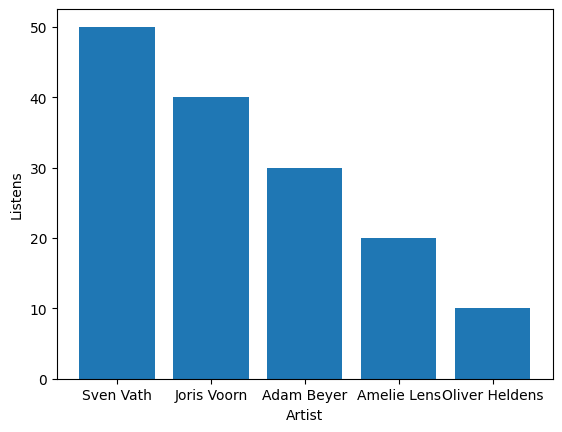

In [ ]:
agent_executor.invoke({
    "input": "Create a bar chart for the most listened techno artists in this year",
})
